# Clustering with MeanShift

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import datasets
from sklearn import cluster
from sklearn import manifold

In [37]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Reduce the dataset to 2-dimension with MDS for better visualization

In [38]:
mds = manifold.MDS(n_components=2)
new_dim = mds.fit_transform(iris.data)
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df.head()

,X,Y
0,-1.747522,-2.077967
1,-1.311960,-2.398276
2,-1.475370,-2.504592
3,-1.222784,-2.490503
4,-1.797841,-2.102731


Clustering with 2 clusters

In [39]:
meanshift = cluster.MeanShift()
label = meanshift.fit_predict(iris.data)
df['label'] = label

color = ['red','green','blue', 'yellow']

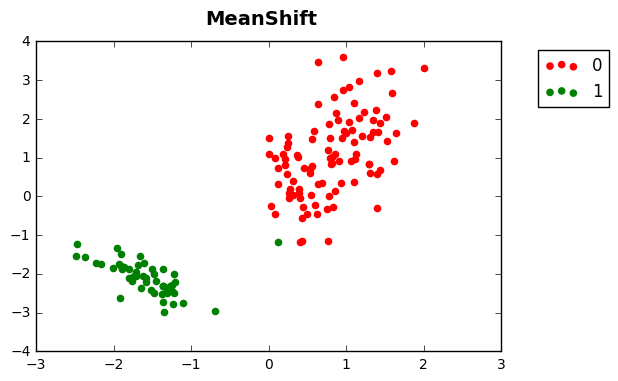

In [40]:
fig = plt.figure()
fig.suptitle('MeanShift', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)


for i, c in enumerate(meanshift.cluster_centers_):
    plt.scatter(df[df.label == i].X, df[df.label == i].Y, label=i, color=color[i])

plt.legend(bbox_to_anchor=(1.25, 1))